In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random lats and long combos
lats = np.random.uniform(low= -90, high= 90, size = 1500)
lngs = np.random.uniform(low= -180, high= 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-78.71101802525287, 143.34484239052034), (43.55443266583731, -84.84733940057922), (-40.88126461933262, -62.480845589619335), (-51.25008767456684, -17.048481468115995), (-14.06331458193145, -146.73310918079616), (77.79169655126574, 94.5368330640564), (-30.13632199651402, -40.16452448523427), (41.044630931551836, 95.76254569270691), (71.29987978106718, 48.22249234444709), (-20.837166328070992, 78.44631870104058), (54.551276633200985, -71.02596499902624), (43.40489011640733, -87.56729547511111), (76.78014601024785, 92.19543661663994), (37.588253855533765, -98.71541996089104), (60.04526562990486, -26.036883520919616), (58.19788212811369, 58.80936370173475), (-60.3943949425659, 176.95457197438844), (-22.743768317927575, 130.55934916339146), (-79.5534510628507, 123.02837918066632), (55.87470000057371, -125.28809329087024), (32.61639060021432, 65.22370491516), (50.89931997194151, 150.2364031534213), (88.2143728623711, 36.65052877539205), (-41.94619397032716, -167.94737878790417), (-38.72950

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
#import api key
from config import weather_api_key
import requests
#build basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Loop through all the cities in the list.

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


for i, city in enumerate(cities):


    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | mount pleasant
Processing Record 3 of Set 1 | viedma
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | tiarei
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | yumen
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 12 of Set 1 | port washington
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | great bend
Processing Record 15 of Set 1 | grindavik
Processing Record 16 of Set 1 | staryy biser
City not found. Skipping...
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | yulara
Processing Record 19 of Set 1 | new norfolk
Processing Record 2

Processing Record 39 of Set 4 | mangotsfield
Processing Record 40 of Set 4 | viligili
City not found. Skipping...
Processing Record 41 of Set 4 | chemodanovka
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | bay city
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | wanning
Processing Record 46 of Set 4 | khudaganj
Processing Record 47 of Set 4 | liuzhou
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | chipinge
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | saint-augustin
Processing Record 4 of Set 5 | nyandoma
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | gamba
Processing Record 8 of Set 5 | machico
Processing Record 9 of Set 5 | andenes
Processing Record 10 of Set 5 | brownsville
Processing Record 11 of Set 5 | 

Processing Record 29 of Set 8 | jodar
Processing Record 30 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | humaita
Processing Record 33 of Set 8 | fianga
City not found. Skipping...
Processing Record 34 of Set 8 | ismailia
Processing Record 35 of Set 8 | saldanha
Processing Record 36 of Set 8 | porto novo
Processing Record 37 of Set 8 | dalby
Processing Record 38 of Set 8 | ukiah
Processing Record 39 of Set 8 | barvinkove
Processing Record 40 of Set 8 | cibitung
Processing Record 41 of Set 8 | nurota
Processing Record 42 of Set 8 | borgarnes
Processing Record 43 of Set 8 | grand gaube
Processing Record 44 of Set 8 | kavaratti
Processing Record 45 of Set 8 | sibolga
Processing Record 46 of Set 8 | viransehir
Processing Record 47 of Set 8 | luwuk
Processing Record 48 of Set 8 | palestine
Processing Record 49 of Set 8 | jalu
Processing Record 50 of Set 8 | tezu
Processing Record 1 of Set 9 

Processing Record 19 of Set 12 | high rock
Processing Record 20 of Set 12 | tidore
City not found. Skipping...
Processing Record 21 of Set 12 | te anau
Processing Record 22 of Set 12 | fergus falls
Processing Record 23 of Set 12 | athens
Processing Record 24 of Set 12 | plettenberg bay
Processing Record 25 of Set 12 | rungata
City not found. Skipping...
Processing Record 26 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 27 of Set 12 | isiolo
Processing Record 28 of Set 12 | laiwu
Processing Record 29 of Set 12 | benjamin aceval
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | winchester
Processing Record 32 of Set 12 | balikpapan
Processing Record 33 of Set 12 | bahir dar
Processing Record 34 of Set 12 | abu zabad
Processing Record 35 of Set 12 | ipixuna
Processing Record 36 of Set 12 | turek
Processing Record 37 of Set 12 | pokhara
Processing Record 38 of Set 12 | isangel
Processing Record 39 of Set 12 | honiara
Processing Record 40 o

In [8]:
len(city_data)

565

In [9]:
#convert the array of dicitionaires to a Pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,45.27,70,75,3.00,AU,2021-07-24 21:47:15
1,Mount Pleasant,32.7941,-79.8626,88.00,62,1,1.01,US,2021-07-24 21:46:02
2,Viedma,-40.8135,-62.9967,45.50,63,100,10.11,AR,2021-07-24 21:50:26
3,Jamestown,42.0970,-79.2353,74.52,88,90,5.01,US,2021-07-24 21:50:31
4,Tiarei,-17.5333,-149.3333,80.62,73,34,10.00,PF,2021-07-24 21:50:31
5,Khatanga,71.9667,102.5000,56.43,62,57,17.52,RU,2021-07-24 21:50:32
6,Arraial Do Cabo,-22.9661,-42.0278,69.76,68,0,16.11,BR,2021-07-24 21:50:32
7,Yumen,40.2833,97.2000,73.33,51,44,4.85,CN,2021-07-24 21:50:33
8,Port Washington,40.8257,-73.6982,82.44,55,75,4.00,US,2021-07-24 21:50:33
9,Talnakh,69.4865,88.3972,48.54,91,100,0.34,RU,2021-07-24 21:50:34


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-07-24 21:47:15,-42.8794,147.3294,45.27,70,75,3.00
1,Mount Pleasant,US,2021-07-24 21:46:02,32.7941,-79.8626,88.00,62,1,1.01
2,Viedma,AR,2021-07-24 21:50:26,-40.8135,-62.9967,45.50,63,100,10.11
3,Jamestown,US,2021-07-24 21:50:31,42.0970,-79.2353,74.52,88,90,5.01
4,Tiarei,PF,2021-07-24 21:50:31,-17.5333,-149.3333,80.62,73,34,10.00
5,Khatanga,RU,2021-07-24 21:50:32,71.9667,102.5000,56.43,62,57,17.52
6,Arraial Do Cabo,BR,2021-07-24 21:50:32,-22.9661,-42.0278,69.76,68,0,16.11
7,Yumen,CN,2021-07-24 21:50:33,40.2833,97.2000,73.33,51,44,4.85
8,Port Washington,US,2021-07-24 21:50:33,40.8257,-73.6982,82.44,55,75,4.00
9,Talnakh,RU,2021-07-24 21:50:34,69.4865,88.3972,48.54,91,100,0.34


In [35]:
#create the output file (csv).
output_data_file = "weather_data/cities.csv"
#export the city-data into a CSV
city_data_df.to_csv(output_data_file, index_label= "City_ID")

In [26]:
# extract relevant fields from the dataframe for plotting
lats= city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

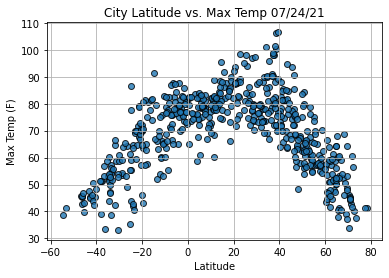

In [27]:
#import time
import time
#Build the scatter plot for latitude vs. max temerature
plt.scatter(lats,
           max_temps,
           edgecolor= "black", linewidth=1, marker = "o", alpha= 0.8, label = "Cities")
#incorporate the graph properties
plt.title(f"City Latitude vs. Max Temp " + time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save chart
plt.savefig("weather_data/Fig1.png")

#show plt
plt.show()

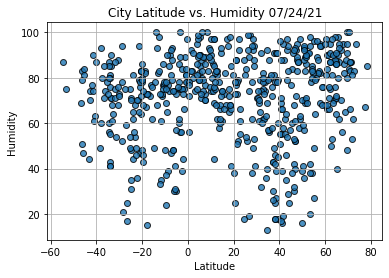

In [28]:
#Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor= "black", linewidth=1, marker = "o", alpha= 0.8, label = "Cities")
#incorporate the graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save chart
plt.savefig("weather_data/Fig2.png")

#show plt
plt.show()

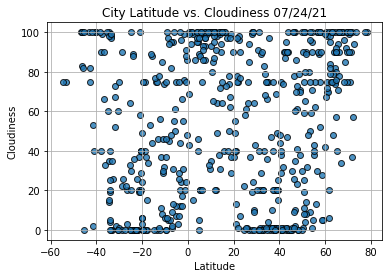

In [29]:
#Build the scatter plot for latitude vs. clouds
plt.scatter(lats,
           cloudiness,
           edgecolor= "black", linewidth=1, marker = "o", alpha= 0.8, label = "Cities")
#incorporate the graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save chart
plt.savefig("weather_data/Fig3.png")

#show plt
plt.show()

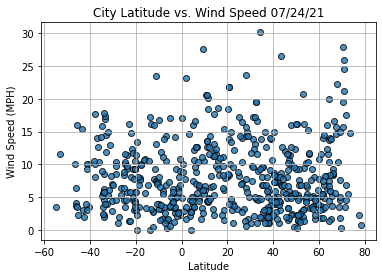

In [30]:
#Build the scatter plot for latitude vs. windspeed
plt.scatter(lats,
           wind_speed,
           edgecolor= "black", linewidth=1, marker = "o", alpha= 0.8, label = "Cities")
#incorporate the graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#save chart
plt.savefig("weather_data/Fig4.png")

#show plt
plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                       Yulara
Country                        AU
Date          2021-07-24 21:50:35
Lat                      -25.2406
Lng                      130.9889
Max Temp                    35.44
Humidity                       75
Cloudiness                     33
Wind Speed                   4.61
Name: 13, dtype: object

In [45]:
#create northern and southern hemisphere dataframe
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


In [47]:
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'plot_linear_regression' is not defined

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                       Yulara
Country                        AU
Date          2021-07-24 21:50:35
Lat                      -25.2406
Lng                      130.9889
Max Temp                    35.44
Humidity                       75
Cloudiness                     33
Wind Speed                   4.61
Name: 13, dtype: object

In [54]:
#create northern and southern hemisphere dataframe
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

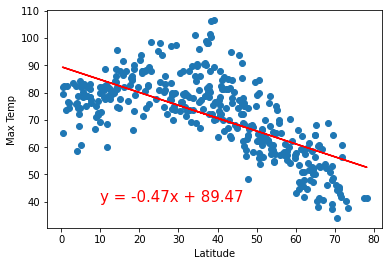

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

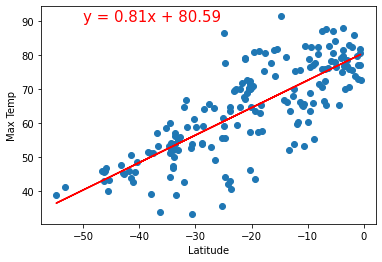

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

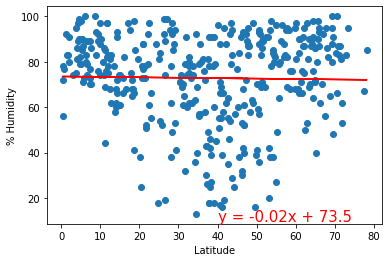

In [58]:
#linear regression on the northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Humidity",
                      "% Humidity", (40,10))

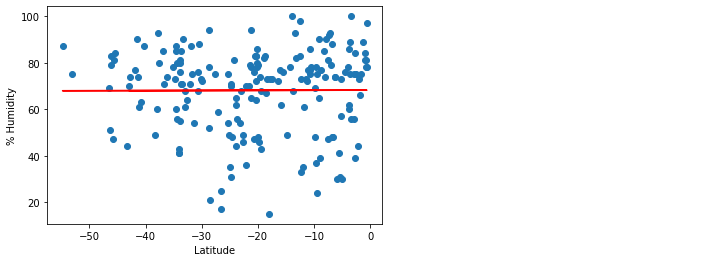

In [63]:
#linear regression on the northern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Humidity",
                      "% Humidity", (40,10))

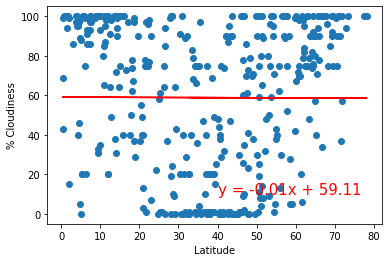

In [62]:
#linear regression on the northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \ for % Cloudiness",
                      "% Cloudiness", (40,10))

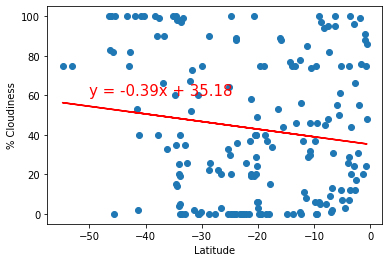

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

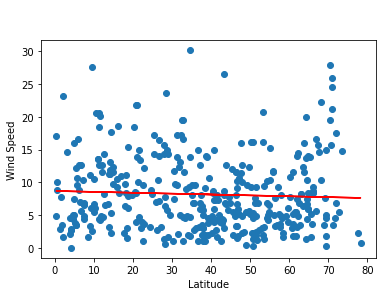

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

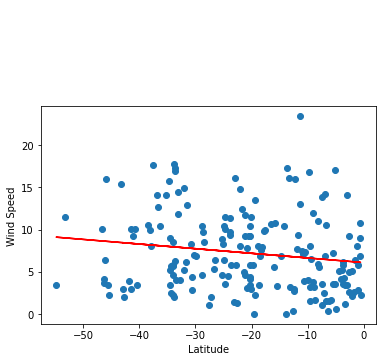

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))